<a href="https://colab.research.google.com/github/PhucTran112233/ProjectAI/blob/main/Project_Celeb_VN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# liên kết Google drive với colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Tải thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import load_model
from keras.models import  Sequential
from keras import regularizers
from keras import layers

In [3]:
train_data = '/content/drive/MyDrive/AI/Train'
val_data =  '/content/drive/MyDrive/AI/Validation'

In [4]:
#preprocessing
train_scale = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,   
                                   height_shift_range=0.2,
                                   horizontal_flip=True, 
                                   vertical_flip=True,
                                   validation_split=0.2)

train_input = train_scale.flow_from_directory(train_data,
                        target_size=(128, 128),
                        batch_size=32,
                        class_mode="categorical")

val_scale = ImageDataGenerator(rescale=1./255)

val_input = val_scale.flow_from_directory(val_data,
                        target_size=(128,128),
                        batch_size=32,
                        class_mode="categorical")

Found 1192 images belonging to 26 classes.
Found 128 images belonging to 26 classes.


In [5]:
print("match class: ", train_input.class_indices)
print("Tổng cộng: ",train_input.num_classes)

match class:  {'Ánh Viên': 0, 'Chí Tài': 1, 'Huỳnh Phương': 2, 'Lí Hải': 3, 'MC Lại Văn Sâm': 4, 'MC Đại Nghĩa': 5, 'Mạc Văn khoa': 6, 'Misthy': 7, 'NSUT Hồng Vân': 8, 'NSUT Tự Long': 9, 'Nguyễn Huy Hoàng': 10, 'Nguyễn Thị Kim Ngân': 11, 'Nhật Anh Trắng': 12, 'PewPew': 13, 'Phan Mạnh Quỳnh': 14, 'Phạm Nhật Vượng': 15, 'Quang Thắng': 16, 'Ribi Sachi Thuỷ': 17, 'Sơn Tùng MTP': 18, 'Sỹ Luân': 19, 'TT Nguyễn Xuân Phúc': 20, 'Vân Dung': 21, 'ViruSs': 22, 'Vũ Cát Tường': 23, 'Đàm Vĩnh Hưng': 24, 'Đen Vâu': 25}
Tổng cộng:  26


In [6]:
#MODEL CNN
model=Sequential()
#TRÍCH XUẤT TẬP DỮ LIỆU(FEATURE EXTRACTORS)
#LAYER 1
model.add(Conv2D(64,(5,5),activation='relu',padding='same', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 4
model.add(Conv2D(1024,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())
#Dense
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(26,activation='softmax'))  
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 256)       147712    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 256)       0

In [7]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint
ckpoint = ModelCheckpoint("models.json",monitor="val_accuracy",save_best_only=True,mode="auto")

In [9]:
face_celeb_train = model.fit(train_input,batch_size=32,epochs=300,verbose=1,validation_data=val_input,callbacks=ckpoint)

Epoch 1/300
38/38 [==============================] - 395s 10s/step - loss: 4.1756 - accuracy: 0.0529 - val_loss: 3.2699 - val_accuracy: 0.0234
Epoch 2/300
38/38 [==============================] - 26s 691ms/step - loss: 3.2213 - accuracy: 0.0529 - val_loss: 3.2965 - val_accuracy: 0.0312
Epoch 3/300
38/38 [==============================] - 10s 253ms/step - loss: 3.2093 - accuracy: 0.0554 - val_loss: 3.3487 - val_accuracy: 0.0234
Epoch 4/300
38/38 [==============================] - 25s 668ms/step - loss: 3.2096 - accuracy: 0.0545 - val_loss: 3.3857 - val_accuracy: 0.0547
Epoch 5/300
38/38 [==============================] - 9s 235ms/step - loss: 3.1977 - accuracy: 0.0520 - val_loss: 3.3960 - val_accuracy: 0.0547
Epoch 6/300
38/38 [==============================] - 26s 685ms/step - loss: 3.1754 - accuracy: 0.0940 - val_loss: 3.2493 - val_accuracy: 0.0625
Epoch 7/300
38/38 [==============================] - 25s 662ms/step - loss: 3.1519 - accuracy: 0.1007 - val_loss: 3.1911 - val_accuracy: 0

In [12]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 40 kB 6.9 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


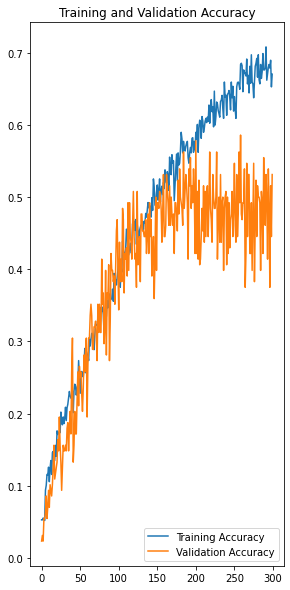

In [15]:
acc = face_celeb_train.history['accuracy']
val_acc = face_celeb_train.history['val_accuracy']

loss = face_celeb_train.history['loss']
val_loss = face_celeb_train.history['val_loss']
epochs_range=range(300)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [16]:
# Saving model in JSON file 
from tensorflow.keras.models import model_from_json
model_in_json = model.to_json()
with open('model.json','w') as json_file:
  json_file.write(model_in_json)

In [17]:
# Loading model from JSON file
model_file = open('model.json','r')
json_model=model_file.read()
model2=model_from_json(json_model)
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 256)       147712    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 256)       0

In [18]:
model.save('/content/drive/MyDrive/AI/NhanDienKhuonMat/face.h5')
model.save('/content/drive/MyDrive/AI/NhanDienKhuonMat/face.hdf5')